# imports

In [120]:
import json
import pyarrow as pa
import pandas as pd
from datasets import Dataset, DatasetDict, Features, Value, ClassLabel, Sequence

# utils 

In [2]:
from IPython.display import display, HTML
import os

def print_captions(index):
    def bold_text(text):
        return f"<b>{text}</b>"
    
    display(HTML(bold_text("\n0-originally-extracted\n")))
    print(scicap_meta_data_single_sentence_caption_train['0-originally-extracted'][index])
    
    display(HTML(bold_text("\n1-lowercase-and-token-and-remove-figure-index\n")))
    print(scicap_meta_data_single_sentence_caption_train['1-lowercase-and-token-and-remove-figure-index'][index])
    
    display(HTML(bold_text("\n2-normalized\n")))
    print(scicap_meta_data_single_sentence_caption_train['2-normalized'][index])


def plot_figure(fig_path):
    print(f"Plotting figure from path: {fig_path}")  # Debug print
    img = plt.imread(fig_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()




def find_fig_path(fig_id):
    current_dir = os.getcwd()
    data_dir = os.path.join(current_dir, '..', 'data')
    data_dir = os.path.abspath(data_dir)
    # print(f"Data directory: {data_dir}")
    def search_directory(directory, target):
        for root, _, files in os.walk(directory):
            for file_name in files:
                if target in file_name:
                    return os.path.join(root, file_name)
        return None
    file_path = search_directory(data_dir, fig_id)
    if file_path:
        return file_path
    else:
        raise FileNotFoundError(f"Figure with id '{fig_id}' not found in data directory or subdirectories")

fig_id = "2006.00601v2-Figure7-1.png"  
try:
    path = find_fig_path(fig_id)
    print(f"Image path: {path}")
except FileNotFoundError as e:
    print(e)


Image path: /Users/IISC AIMLOPS/iisc-capstone/genai-cv-image-caption-scicap-data/data/SciCap-Yes-Subfig-Img/test/2006.00601v2-Figure7-1.png


# reference dataset 

In [1]:
from datasets import load_dataset

raw_datasets = load_dataset("HuggingFaceH4/llava-instruct-mix-vsft")
# train_dataset = raw_datasets["train"]
eval_dataset = raw_datasets["test"]

Resolving data files:   0%|          | 0/20 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/20 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/23 [00:00<?, ?it/s]

In [2]:
type(eval_dataset)

datasets.arrow_dataset.Dataset

In [3]:
eval_dataset.features

{'messages': [{'content': [{'index': Value(dtype='int64', id=None),
     'text': Value(dtype='string', id=None),
     'type': Value(dtype='string', id=None)}],
   'role': Value(dtype='string', id=None)}],
 'images': Sequence(feature=Image(mode=None, decode=True, id=None), length=-1, id=None)}

In [4]:
eval_dataset

Dataset({
    features: ['messages', 'images'],
    num_rows: 13640
})

In [4]:
print(f'Type of dataset from hugging face:{type(train_dataset)}')

Type of dataset from hugging face:<class 'datasets.arrow_dataset.Dataset'>


In [5]:
print(f"Type of a single datapoint :{type(train_dataset[0])}")

Type of a single datapoint :<class 'dict'>


In [6]:
train_dataset[0].keys()

dict_keys(['messages', 'images'])

In [333]:
type(train_dataset[0]['messages'])

dict

In [332]:
train_dataset[0]['images']

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=500x233>]

In [144]:
type(train_dataset[0]['messages'])

list

In [146]:
len(train_dataset[0]['messages'])

8

In [149]:
type(train_dataset[0]['messages'][0]['content'])

list

In [152]:
train_dataset[0]['messages'][0]['content']

[{'index': None, 'text': 'Who wrote this book?\n', 'type': 'text'},
 {'index': 0, 'text': None, 'type': 'image'}]

In [151]:
for content in train_dataset[0]['messages'][0]['content']:
    print(type(content['text']))
    print(content['text'])

<class 'str'>
Who wrote this book?

<class 'NoneType'>
None


In [153]:
# Display the messages
for message in train_dataset[0]['messages']:
    for content in message['content']:
        if content['type'] == 'text':
            role = message['role'].capitalize()
            print(f"{role}: {content['text']}")

User: Who wrote this book?

Assistant: Donna Eden
User: What is the title of this book?
Assistant: The Energies of Love: Using Energy Medicine to Keep Your Relationship Thriving
User: What type of book is this?
Assistant: Health, Fitness & Dieting
User: Is this a fitness book?
Assistant: Yes


Matplotlib is building the font cache; this may take a moment.


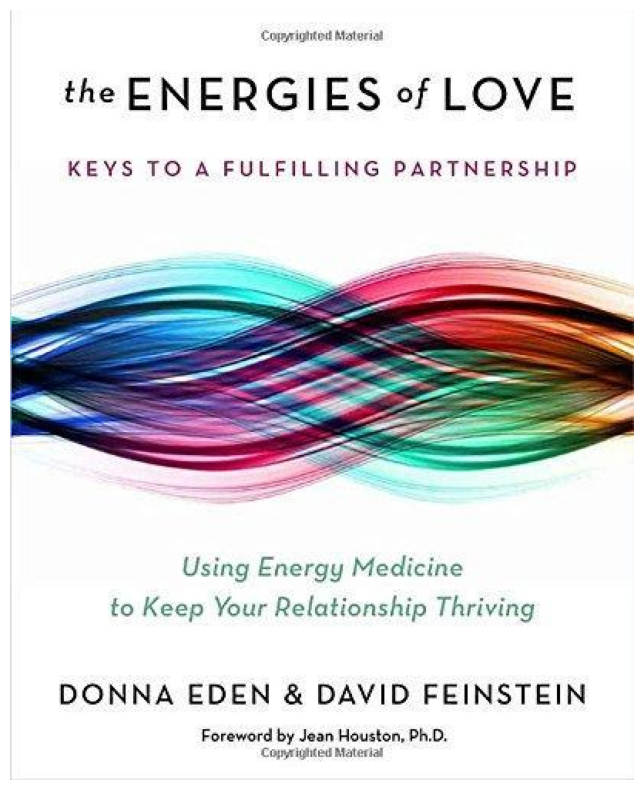

In [11]:
import matplotlib.pyplot as plt
image = train_dataset[0]['images'][0]
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [14]:
# train_dataset.save_to_disk("../lava-instruct-mix-vsft/train")
# eval_dataset.save_to_disk("../lava-instruct-mix-vsft/test")

# scicap metadata

In [3]:
def read_json(path):
    with open(path,'r') as f:
        json_f = json.load(f)
        return json_f

In [4]:
scicap_meta_data = pd.read_excel('../data/captions_meta_data_19_may_24.xlsx')

In [5]:
scicap_meta_data.shape

(416804, 8)

In [6]:
scicap_meta_data.columns

Index(['contains-subfigure', 'Img-text', 'paper-ID', 'figure-ID',
       'figure-type', '0-originally-extracted',
       '1-lowercase-and-token-and-remove-figure-index', '2-normalized'],
      dtype='object')

In [7]:
scicap_meta_data.head(2)


,contains-subfigure,Img-text,paper-ID,figure-ID,figure-type,0-originally-extracted,1-lowercase-and-token-and-remove-figure-index,2-normalized
0,True,"['box', 'without', 'box', 'S', 'E', 'R', 'M', ...",2006.00601v2,2006.00601v2-Figure7-1.png,Graph Plot,Figure 7. The effects of the box constraint in...,{'caption': 'the effects of the box constraint...,{'2-1-basic-num': {'caption': 'the effects of ...
1,True,"['one', 'MPI', 'process', 'per', 'node', 'one'...",1106.5908v1,1106.5908v1-Figure10-1.png,Graph Plot,Figure 10: Strong scaling performance data for...,{'caption': 'strong scaling performance data f...,{'2-1-basic-num': {'caption': 'strong scaling ...


In [8]:
# scicap_meta_data['0-originally-extracted'][0]
# scicap_meta_data['figure-ID'][0]
# scicap_meta_data['0-originally-extracted'][0]


In [9]:
# scicap_meta_data['1-lowercase-and-token-and-remove-figure-index'][0]

# Training data single sentence caption : No-Subfig

In [10]:
train_data_single_sentence_caption = read_json("../data/List-of-Files-for-Each-Experiments/Single-Sentence-Caption/No-Subfig/train/file_idx.json")

In [11]:
test_data_single_sentence_caption = read_json('../data/List-of-Files-for-Each-Experiments/Single-Sentence-Caption/No-Subfig/test/file_idx.json')

In [12]:
print(f"Total number of training images with single sentence caption: {len(train_data_single_sentence_caption)}")
print(f"Total number of test images with single sentence caption: {len(test_data_single_sentence_caption)}")


Total number of training images with single sentence caption: 75494
Total number of test images with single sentence caption: 9459


In [13]:
scicap_meta_data_single_sentence_caption_train = scicap_meta_data[scicap_meta_data['figure-ID'].isin(train_data_single_sentence_caption)]

In [14]:
scicap_meta_data_single_sentence_caption_test = scicap_meta_data[scicap_meta_data['figure-ID'].isin(test_data_single_sentence_caption)]
scicap_meta_data_single_sentence_caption_test.shape

(9459, 8)

In [15]:
scicap_meta_data_single_sentence_caption_train.shape

(75494, 8)

In [16]:
scicap_meta_data_single_sentence_caption_train.head(2)

,contains-subfigure,Img-text,paper-ID,figure-ID,figure-type,0-originally-extracted,1-lowercase-and-token-and-remove-figure-index,2-normalized
41686,False,[],1704.03939v1,1704.03939v1-Figure3-1.png,Graph Plot,Figure 3. Random Voice Test Score,"{'caption': 'random voice test score .', 'sent...",{'2-1-basic-num': {'caption': 'random voice te...
41689,False,[],1901.03115v1,1901.03115v1-Figure7-1.png,Graph Plot,Figure 7: Optimal revenues as a function of wa...,{'caption': 'optimal revenues as a function of...,{'2-1-basic-num': {'caption': 'optimal revenue...


In [17]:
scicap_meta_data_single_sentence_caption_train.reset_index(inplace=True, drop=True)

In [18]:
scicap_meta_data_single_sentence_caption_test.reset_index(inplace=True, drop=True)


# Test images for inference

In [114]:
test_llava = scicap_meta_data_single_sentence_caption_train[:8]['figure-ID'].tolist()

In [ ]:
test_llava_img_paths = []
for fig_id in test_llava:
    fig_path = find_fig_path(fig_id)
    test_llava_img_paths.append(fig_path)
test_llava_img_paths

In [ ]:
import shutil


destination_dir = '/Users/IISC AIMLOPS/iisc-capstone/genai-cv-image-caption-scicap-data/test_images'
os.makedirs(destination_dir, exist_ok=True)

try:
    for image_path in test_llava_img_paths:
        shutil.copy(image_path, destination_dir)
        print(f"Copied: {image_path} to {destination_dir}")
except FileNotFoundError as e:
    print(f"File not found: {image_path}")
except Exception as e:
    print(f"Error copying {image_path}: {e}")


# visualize existing captions

FIGURE ID--1702.03907v1-Figure7-1.png
Plotting figure from path: /Users/IISC AIMLOPS/iisc-capstone/genai-cv-image-caption-scicap-data/data/SciCap-No-Subfig-Img/val/1702.03907v1-Figure7-1.png


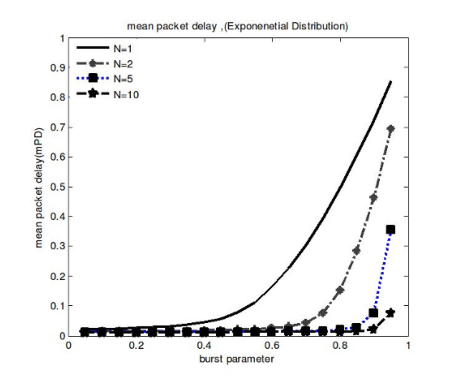

Figure 7: Optimal revenues as a function of waiting cost when: µ = 2.8, λ = 2.2 and R = 10


{'caption': 'optimal revenues as a function of waiting cost when : µ = 2.8 , λ = 2.2 and r = 10 .', 'sentence': ['optimal revenues as a function of waiting cost when : µ = 2.8 , λ = 2.2 and r = 10 .'], 'token': ['optimal', 'revenues', 'as', 'a', 'function', 'of', 'waiting', 'cost', 'when', ':', 'µ', '=', '2.8', ',', 'λ', '=', '2.2', 'and', 'r', '=', '10', '.']}


{'2-1-basic-num': {'caption': 'optimal revenues as a function of waiting cost when : µ = NUM-TK , λ = NUM-TK and r = NUM-TK .', 'sentence': ['optimal revenues as a function of waiting cost when : µ = NUM-TK , λ = NUM-TK and r = NUM-TK .'], 'token': ['optimal', 'revenues', 'as', 'a', 'function', 'of', 'waiting', 'cost', 'when', ':', 'µ', '=', 'NUM-TK', ',', 'λ', '=', 'NUM-TK', 'and', 'r', '=', 'NUM-TK', '.']}, '2-2-advanced-euqation-bracket': {'caption': 'optimal revenues as a function of waiting cost when : EQUAT-TK , EQUAT-TK and EQUAT-TK .', 'sentence': ['optimal revenues as a function of waiting cost when : EQUAT-TK , EQUAT-TK and EQUAT-TK .'], 'tokens': ['optimal', 'revenues', 'as', 'a', 'function', 'of', 'waiting', 'cost', 'when', ':', 'EQUAT-TK', ',', 'EQUAT-TK', 'and', 'EQUAT-TK', '.']}}


In [202]:
index = 1
# fig_id = scicap_meta_data_single_sentence_caption_train['figure-ID'][index]
fig_id = scicap_meta_data_single_sentence_caption_val['figure-ID'][index]

print(f"FIGURE ID--{fig_id}")
fig_path = find_fig_path(fig_id)
plot_figure(fig_path)
print_captions(index)

# prepare scicap data 

* captions: using lowercase from **1-lowercase-and-token-and-remove-figure-index** 

### 1. list of dictionaries with image paths and captions

In [19]:
scicap_meta_data_single_sentence_caption_train.columns

Index(['contains-subfigure', 'Img-text', 'paper-ID', 'figure-ID',
       'figure-type', '0-originally-extracted',
       '1-lowercase-and-token-and-remove-figure-index', '2-normalized'],
      dtype='object')

In [20]:
meta_data = scicap_meta_data_single_sentence_caption_train.loc[:100]
meta_data.shape

(101, 8)

In [21]:
meta_data.head(2)

,contains-subfigure,Img-text,paper-ID,figure-ID,figure-type,0-originally-extracted,1-lowercase-and-token-and-remove-figure-index,2-normalized
0,False,[],1704.03939v1,1704.03939v1-Figure3-1.png,Graph Plot,Figure 3. Random Voice Test Score,"{'caption': 'random voice test score .', 'sent...",{'2-1-basic-num': {'caption': 'random voice te...
1,False,[],1901.03115v1,1901.03115v1-Figure7-1.png,Graph Plot,Figure 7: Optimal revenues as a function of wa...,{'caption': 'optimal revenues as a function of...,{'2-1-basic-num': {'caption': 'optimal revenue...


In [22]:
meta_data_test = scicap_meta_data_single_sentence_caption_test.loc[:30]
meta_data_test.shape

(31, 8)

In [26]:
import ast
def prepare_scicap_image_caption_list(meta_data):
    image_and_caption_list = []
    for i, row in meta_data.iterrows():
        fig_id = row['figure-ID']
        fig_path = find_fig_path(fig_id)
        caption = ast.literal_eval(row['1-lowercase-and-token-and-remove-figure-index'])['caption']
        data_point = {'image_path':fig_path,'caption':caption}
        image_and_caption_list.append(data_point)
    return image_and_caption_list
    

In [27]:
scientific_images_and_captions = prepare_scicap_image_caption_list(meta_data)

In [28]:
scientific_images_and_captions_test = prepare_scicap_image_caption_list(meta_data_test)


In [29]:
scientific_images_and_captions[:5]
scientific_images_and_captions_test[:5]

[{'image_path': '/Users/IISC AIMLOPS/iisc-capstone/genai-cv-image-caption-scicap-data/data/SciCap-No-Subfig-Img/test/1806.04589v2-Figure4-1.png',
  'caption': 'the weighted sum computation bits of all users versus the transmit power of the uav under different schemes .'},
 {'image_path': '/Users/IISC AIMLOPS/iisc-capstone/genai-cv-image-caption-scicap-data/data/SciCap-No-Subfig-Img/test/2003.04826v1-Figure8-1.png',
  'caption': 'scalability results for small world graphs .'},
 {'image_path': '/Users/IISC AIMLOPS/iisc-capstone/genai-cv-image-caption-scicap-data/data/SciCap-No-Subfig-Img/test/2001.03329v1-Figure13-1.png',
  'caption': 'average relative improvement/worsening of accuracy , f1-score and auroc of cnn models with focal loss function against cnn models with cross-entropy loss function .'},
 {'image_path': '/Users/IISC AIMLOPS/iisc-capstone/genai-cv-image-caption-scicap-data/data/SciCap-No-Subfig-Img/test/2006.09946v2-Figure1-1.png',
  'caption': 'the convergence rate guarantee

In [30]:
len(scientific_images_and_captions) , len(scientific_images_and_captions_test)

(101, 31)

### 2. Build the structured dataset

#### messages-1

In [31]:
# from PIL import Image

# data = []
# for item in scientific_images_and_captions:
#     conversation = {
#         "messages": [
#             {
#                 "role": "user",
#                 "content": [
#                     {"index": None, "type": "text", "text": "Can you provide a scientific caption to this image?\n"},
#                     {"index": 0, "type": "image", "text": None}
#                 ]
#             },
#             {
#                 "role": "assistant",
#                 "content": [
#                     {"index": None, "type": "text", "text": item["caption"]}
#                 ]
#             },
#             {
#                 "role": "user",
#                 "content": [
#                     {"index": None,"type": "text", "text": "What does this image represent?\n"}
#                 ]
#             },
#             {
#                 "role": "assistant",
#                 "content": [
#                     {"type": "text", "text": item["caption"]}
#                 ]
#             }
#         ],
#         "images": [Image.open(item["image_path"])]
#     }
#     data.append(conversation)



In [32]:
scientific_images_and_captions[0]

{'image_path': '/Users/IISC AIMLOPS/iisc-capstone/genai-cv-image-caption-scicap-data/data/SciCap-No-Subfig-Img/train/1704.03939v1-Figure3-1.png',
 'caption': 'random voice test score .'}

#### messages-2

In [73]:
from PIL import Image as PILImage
def build_messages(scientific_images_and_captions):
    train_data = []
    for item in scientific_images_and_captions:
        conversation = {
            "messages": [
                {
                    "role": "user",
                    "content": [
                        {"type": "text", "text": "Can you provide a scientific caption for this image?\n"},
                        {"index": 0, "type": "image", "text": None}
                    ]
                },
                {
                    "role": "assistant",
                    "content": [
                        {"index": None,"type": "text", "text": item["caption"]}
                    ]
                },
                {
                    "role": "user",
                    "content": [
                        {"index": None,"type": "text", "text": "What are the key features observed in this image?\n"}
                    ]
                },
                {
                    "role": "assistant",
                    "content": [
                        {"index": None,"type": "text", "text": item["caption"]}
                    ]
                },
                {
                    "role": "user",
                    "content": [
                        {"index": None,"type": "text", "text": "Can you provide a scientific explanation for this image?\n"}
                    ]
                },
                {
                    "role": "assistant",
                    "content": [
                        {"index": None,"type": "text", "text": item["caption"]}
                    ]
                },
                {
                    "role": "user",
                    "content": [
                        {"index": None,"type": "text", "text": "What is the significance of the findings shown in this image?\n"}
                    ]
                },
                {
                    "role": "assistant",
                    "content": [
                        {"index": None,"type": "text", "text": item["caption"]}
                    ]
                }
            ],
            # "images": [PILImage.open(item["image_path"])]
            "images": [item["image_path"]]
            
        }
        train_data.append(conversation)
    return train_data


In [74]:
train_data = build_messages(scientific_images_and_captions)
test_data = build_messages(scientific_images_and_captions_test)

In [75]:
len(train_data) , len(test_data)

(101, 31)

In [76]:
type(train_data[0]['images'])

list

In [77]:
def display_messages(data,index):
    for message in data[index]['messages']:
        for content in message['content']:
            if content['type'] == 'text':
                role = message['role'].capitalize()
                print(f"{role}: {content['text']}")

In [78]:
display_messages(train_data,1)

User: Can you provide a scientific caption for this image?

Assistant: optimal revenues as a function of waiting cost when : µ = 2.8 , λ = 2.2 and r = 10 .
User: What are the key features observed in this image?

Assistant: optimal revenues as a function of waiting cost when : µ = 2.8 , λ = 2.2 and r = 10 .
User: Can you provide a scientific explanation for this image?

Assistant: optimal revenues as a function of waiting cost when : µ = 2.8 , λ = 2.2 and r = 10 .
User: What is the significance of the findings shown in this image?

Assistant: optimal revenues as a function of waiting cost when : µ = 2.8 , λ = 2.2 and r = 10 .


In [79]:
display_messages(test_data,0)

User: Can you provide a scientific caption for this image?

Assistant: the weighted sum computation bits of all users versus the transmit power of the uav under different schemes .
User: What are the key features observed in this image?

Assistant: the weighted sum computation bits of all users versus the transmit power of the uav under different schemes .
User: Can you provide a scientific explanation for this image?

Assistant: the weighted sum computation bits of all users versus the transmit power of the uav under different schemes .
User: What is the significance of the findings shown in this image?

Assistant: the weighted sum computation bits of all users versus the transmit power of the uav under different schemes .


In [367]:
# data = train_data
# output_file = '../data_v1/v1_single_sentence_caption_train_messages_101.jsonl'

data = test_data
output_file = '../data_v1/v1_single_sentence_caption_test_messages_31.jsonl'

with open(output_file, 'w') as f:
    for entry in data:
        json.dump({
            "messages": entry["messages"],
            "images": entry["images"][0].filename  
        }, f)
        f.write('\n')




In [ ]:
def save_messages(data,output_file):
    with open(output_file, 'w') as f:
        for entry in data:
            json.dump({
                "messages": entry["messages"],
                "images": entry["images"][0].filename  
            }, f)
            f.write('\n')


In [592]:
train_data[0]

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'Can you provide a scientific caption for this image?\n'},
    {'index': 0, 'type': 'image', 'text': None}]},
  {'role': 'assistant',
   'content': [{'index': None,
     'type': 'text',
     'text': 'random voice test score .'}]},
  {'role': 'user',
   'content': [{'index': None,
     'type': 'text',
     'text': 'What are the key features observed in this image?\n'}]},
  {'role': 'assistant',
   'content': [{'index': None,
     'type': 'text',
     'text': 'random voice test score .'}]},
  {'role': 'user',
   'content': [{'index': None,
     'type': 'text',
     'text': 'Can you provide a scientific explanation for this image?\n'}]},
  {'role': 'assistant',
   'content': [{'index': None,
     'type': 'text',
     'text': 'random voice test score .'}]},
  {'role': 'user',
   'content': [{'index': None,
     'type': 'text',
     'text': 'What is the significance of the findings shown in this image?\n'}]},
  {'ro

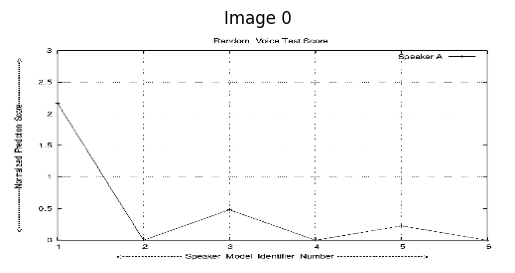

In [553]:
def plot_images(images):
    for i, img in enumerate(images):
        plt.figure()
        plt.imshow(img)
        plt.title(f'Image {i}')
        plt.axis('off')  # Hide the axes
        plt.show()

# Plot the images from data[0]['images']
plot_images(train_data[0]['images'])

# Create HF data set | arrow dataset 

## method 1

In [43]:
# from datasets import Dataset, Features, Value, ClassLabel, Image as HFImage
# import json
# import os

# # Function to read and encode images
# def encode_image(image_path):
#     if os.path.exists(image_path):
#         with open(image_path, 'rb') as image_file:
#             return image_file.read()
#     return None


# # Define the dataset schema
# features = Features({
#     'messages': Value('string'),  # Storing serialized JSON string
#     'images': Sequence(feature=HFImage(decode=True))
# })

# # Create the dataset
# dataset = Dataset.from_dict({'messages': [d['messages'] for d in test_data], 
#                              'images': [d['images'] for d in test_data]}, 
#                             features=features)

# print(dataset)


## method 2 

In [44]:
# from datasets import Features, Sequence, Value, Image
# import copy

# class CustomDataset:
#     def __init__(self, data):
#         self.data = data
#         self.features = None
    
#     def __getitem__(self, index):
#         return copy.deepcopy(self.data[index])
    
#     def __len__(self):
#         return len(self.data)

# # Define the schema
# schema = Features({
#     'messages': Sequence({
#         'role': Value('string'),
#         'content': Sequence({
#             'type': Value('string'),
#             'text': Value('string'),
#             'index': Value('int64')
#         })
#     }),
#     'images': Sequence(Image(decode=True))
# })

# dataset = CustomDataset(train_data)
# dataset.features = schema
# print(dataset[0])  
# print(len(dataset))  

In [47]:
# dataset.features
# dataset.data
train_data[0]

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'Can you provide a scientific caption for this image?\n'},
    {'index': 0, 'type': 'image', 'text': None}]},
  {'role': 'assistant',
   'content': [{'index': None,
     'type': 'text',
     'text': 'random voice test score .'}]},
  {'role': 'user',
   'content': [{'index': None,
     'type': 'text',
     'text': 'What are the key features observed in this image?\n'}]},
  {'role': 'assistant',
   'content': [{'index': None,
     'type': 'text',
     'text': 'random voice test score .'}]},
  {'role': 'user',
   'content': [{'index': None,
     'type': 'text',
     'text': 'Can you provide a scientific explanation for this image?\n'}]},
  {'role': 'assistant',
   'content': [{'index': None,
     'type': 'text',
     'text': 'random voice test score .'}]},
  {'role': 'user',
   'content': [{'index': None,
     'type': 'text',
     'text': 'What is the significance of the findings shown in this image?\n'}]},
  {'ro

## method 3 

In [48]:
# from datasets import Dataset, Features, Sequence, Value, Image
# import copy

# def restructure_data(data):
#     restructured = {
#         'messages': [],
#         'images': []
#     }
#     for item in data:
#         restructured['messages'].append(item['messages'])
#         restructured['images'].append(item['images'])
#     return restructured

# def safe_encode(feature, obj):
#     if obj is None:
#         return None
#     if isinstance(feature, Sequence):
#         return [safe_encode(feature.feature, item) for item in obj] if obj else []
#     if isinstance(feature, Features):
#         return {k: safe_encode(feature[k], obj.get(k)) for k in feature}
#     return obj

# # Define the schema
# schema = Features({
#     'messages': Sequence(Sequence({
#         'role': Value('string'),
#         'content': Sequence({
#             'type': Value('string'),
#             'text': Value('string'),
#             'index': Value('int64')
#         })
#     })),
#     # 'images': Sequence(Sequence(Image(decode=True)))
#     'images': Sequence(Image(decode=True))  # Storing PIL images directly
#     # 'images': Sequence(Image())  # Storing PIL images directly
    
# })

# restructured_data = restructure_data(test_data)

# # type(restructured_data)
# # restructured_data.keys()
# # restructured_data['images']

# encoded_data = safe_encode(schema, restructured_data)
# # type(encoded_data)
# # encoded_data.keys()
# # encoded_data['images']

# dataset = Dataset.from_dict(encoded_data)#.cast_column("images", Image(decode=True))
# print(type(dataset))

# # # To access an item with the original structure, you can do:
# # def get_original_item(dataset, index):
# #     return {
# #         'messages': dataset['messages'][index],
# #         'images': dataset['images'][index]
# #     }

# # # Example usage:
# # print(get_original_item(dataset, 0))  # This will print the first item in your original structure

<class 'datasets.arrow_dataset.Dataset'>


In [95]:
# dataset.cast_column("images",datasets.Image())
len(dataset)
dataset[0]
test_data[0]

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'Can you provide a scientific caption for this image?\n'},
    {'index': 0, 'type': 'image', 'text': None}]},
  {'role': 'assistant',
   'content': [{'index': None,
     'type': 'text',
     'text': 'the weighted sum computation bits of all users versus the transmit power of the uav under different schemes .'}]},
  {'role': 'user',
   'content': [{'index': None,
     'type': 'text',
     'text': 'What are the key features observed in this image?\n'}]},
  {'role': 'assistant',
   'content': [{'index': None,
     'type': 'text',
     'text': 'the weighted sum computation bits of all users versus the transmit power of the uav under different schemes .'}]},
  {'role': 'user',
   'content': [{'index': None,
     'type': 'text',
     'text': 'Can you provide a scientific explanation for this image?\n'}]},
  {'role': 'assistant',
   'content': [{'index': None,
     'type': 'text',
     'text': 'the weighted sum comput

## method 4

<PIL.Image.Image image mode=RGB size=500x233 at 0x335710850>


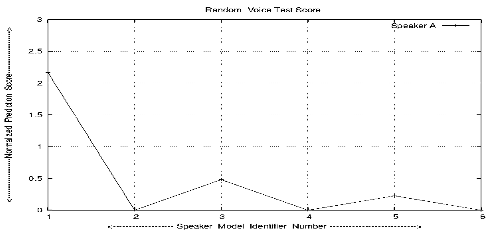

In [50]:
path = '/Users/IISC AIMLOPS/iisc-capstone/genai-cv-image-caption-scicap-data/data/SciCap-No-Subfig-Img/train/1704.03939v1-Figure3-1.png'
with PILImage.open(path) as img:
    img = img.convert('RGB')  
    print(img)
img


In [160]:
from datasets import Dataset, Features, Sequence, Value, Image
import copy
from PIL import Image as PILImage
import numpy as np

def return_image_as_is(image_path):
    return image_path

def load_image(image_path):
    """Load an image from a file path into a PIL.Image.Image object."""
    try:
        return PILImage.open(image_path).convert('RGB')
    except IOError as e:
        print(f"Error loading image: {image_path} with error: {e}")
        return None



def restructure_data(data):
    """Restructure data to load images and ensure compatibility with the dataset schema."""
    restructured = {
        'messages': [],
        'images': []
    }
    for item in data:
        restructured['messages'].append(item['messages'])
        loaded_images = []
        loaded_images = [load_image(img_path) for img_path in item['images'] if img_path]        
        restructured['images'].append(loaded_images)  
    return restructured

def safe_encode(feature, obj):
    """Encode data safely according to the provided feature schema."""
    if obj is None:
        return None
    if isinstance(feature, Sequence) and isinstance(obj, list):
        return [safe_encode(feature.feature, item) for item in obj]
    if isinstance(feature, Features):
        return {k: safe_encode(feature[k], obj.get(k)) for k in feature}
    return obj

# Define the schema

schema = Features(
    {'messages': [{'content': [{'index': Value(dtype='int64', id=None),
     'text': Value(dtype='string', id=None),
     'type': Value(dtype='string', id=None)}],
   'role': Value(dtype='string', id=None)}],
 'images': Sequence(feature=Image(mode=None, decode=True, id=None), length=-1, id=None)}
)


restructured_data = restructure_data(train_data)
encoded_data = safe_encode(schema, restructured_data)
dataset = Dataset.from_dict(encoded_data)#.cast_column("images",Image(mode=None, decode=True, id=None))
print(type(dataset))



In [161]:
# dataset[0]
dataset = dataset.cast_column("images",Sequence(feature=Image(mode=None, decode=True, id=None)))

Casting the dataset:   0%|          | 0/101 [00:00<?, ? examples/s]

In [ ]:
dataset_dict = DatasetDict({
    "train": train_dataset,
    "test": test_dataset
})

In [162]:
# dataset[0]
dataset

Dataset({
    features: ['messages', 'images'],
    num_rows: 101
})

In [5]:
from huggingface_hub import notebook_login

notebook_login()


In [154]:
dataset.push_to_hub("bhalladitya/scicap-test-sample")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/31 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/bhalladitya/scicap-test-sample/commit/940896ce1b3fb8ce53ee697bb9757fa92c924aad', commit_message='Upload dataset', commit_description='', oid='940896ce1b3fb8ce53ee697bb9757fa92c924aad', pr_url=None, pr_revision=None, pr_num=None)

In [165]:
dataset.save_to_disk("../data_v1/train_dataset")

Saving the dataset (0/1 shards):   0%|          | 0/101 [00:00<?, ? examples/s]

In [ ]:
from huggingface_hub import delete_repo
repo_id = "bhalladitya/scicap-test"
delete_repo(repo_id=repo_id, token=True, repo_type="dataset")


In [112]:
dataset.save_to_disk("../data_v1/train_dataset_2")

Saving the dataset (0/1 shards):   0%|          | 0/101 [00:00<?, ? examples/s]

In [121]:
tr = Dataset.load_from_disk("../data_v1/train_dataset_2/")
ts = Dataset.load_from_disk("../data_v1/test_dataset_2/")

In [123]:
tr.push_to_hub()

Dataset({
    features: ['messages', 'images'],
    num_rows: 101
})

# Extra

In [2]:
import datasets
dataset = datasets.load_from_disk("../data/data_v2/dataset/")

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['messages', 'images'],
        num_rows: 10
    })
    test: Dataset({
        features: ['messages', 'images'],
        num_rows: 10
    })
})

In [6]:
dataset.push_to_hub("bhalladitya/scicap-single-sentence-caption-no-subfig")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/bhalladitya/scicap-single-sentence-caption-no-subfig/commit/feaaaf21bec56da90fb39782fec0c6bb7c17be4d', commit_message='Upload dataset', commit_description='', oid='feaaaf21bec56da90fb39782fec0c6bb7c17be4d', pr_url=None, pr_revision=None, pr_num=None)

In [155]:
# def restructure_data_initial(data):
#     """Initially structure data to include only messages."""
#     restructured = {
#         'messages': [],
#         'images': []  # Initially empty or placeholder values
#     }
#     for item in data:
#         restructured['messages'].append(item['messages'])
#         restructured['images'].append(None)  # Placeholder for images
#     return restructured

# def append_images(data, images):
#     """Append images to the already structured data."""
#     for i, img_list in enumerate(images):
#         loaded_images = [load_image(img_path) for img_path in img_list if img_path]
#         data['images'][i] = loaded_images  # Replace placeholder with actual images

# # Initial data preparation
# restructured_data = restructure_data_initial(test_data)
# encoded_data = safe_encode(schema, restructured_data)
# dataset = Dataset.from_dict(encoded_data)

# # Later, when images are ready
# images = [item['images'] for item in test_data]  
# append_images(encoded_data, images)

# # Update dataset with images
# dataset = Dataset.from_dict(encoded_data)


In [107]:
# dataset[0]

In [ ]:
            # {
            #     "role": "user",
            #     "content": [
            #         {"type": "text", "text": "What is the purpose of this image?\n"}
            #     ]
            # },
            # {
            #     "role": "assistant",
            #     "content": [
            #         {"type": "text", "text": item["caption"]}
            #     ]
            # },
            # {
            #     "role": "user",
            #     "content": [
            #         {"type": "text", "text": "How does this image relate to the study it is part of?\n"}
            #     ]
            # },
            # {
            #     "role": "assistant",
            #     "content": [
            #         {"type": "text", "text": item["caption"]}
            #     ]
            # },
